In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the data you receive into a Pandas DataFrame.


In [ ]:

DataFrame = pd.read_csv('./airline_dec_2008_50k.csv')
DataFrame.head()

## Show the first five rows of the data set.

In [ ]:
DataFrame.head(5)

## Show the description and the info of the data set.

In [ ]:

data_desc=DataFrame.describe()
data_desc2=data_desc.info()
data_desc2

## find colume they have relation between each other

In [ ]:

DataFrame.corr()
# CRSElapsedTime ,Distance

In [41]:
crse_elapsedtime_values = DataFrame["CRSElapsedTime"].values
distance_value = DataFrame["Distance"].values

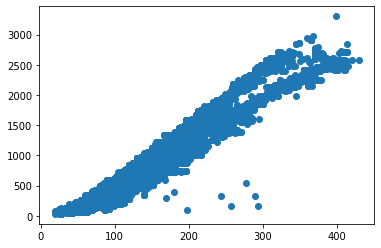

In [42]:
plt.scatter(crse_elapsedtime_values, distance_value)
plt.show()

In [ ]:
crse_elapsedtime_vector =crse_elapsedtime_values.reshape(-1,1)
crse_elapsedtime_vector

In [45]:

model = LinearRegression().fit(crse_elapsedtime_vector, distance_value)

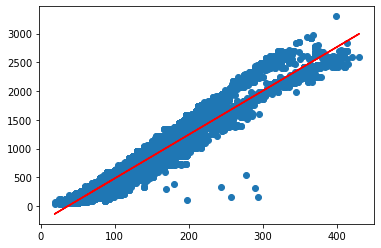

In [46]:
prediction = model.predict(crse_elapsedtime_vector)

plt.scatter(crse_elapsedtime_vector, distance_value)
plt.plot(crse_elapsedtime_vector, prediction, color="red")
plt.show()

## Using a regression model, split your data into train and test data.

In [47]:
# CRSElapsedTime ,Distance
X = DataFrame['CRSElapsedTime'].values
y = DataFrame['Distance'].values
X

array([60, 70, 85, ..., 90, 95, 95])

In [ ]:
X=X.reshape(-1,1)
X

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (40000, 1)
y_train shape (40000,)
X_test shape (10000, 1)
y_test shape (10000,)
[ 828  224  336 ...  861 1416  649]


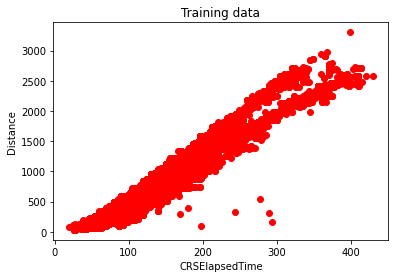

In [53]:
# CRSElapsedTime ,Distance
%matplotlib inline
plt.scatter(x_train,y_train,color='red')
plt.xlabel('CRSElapsedTime')
plt.ylabel('Distance')
plt.title('Training data')
plt.show()

## Fit your training split to the regression model.
## Show your regression model’s score.

In [54]:
lm = LinearRegression()

lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")

print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 94.49 %
Test accuracy 94.42 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

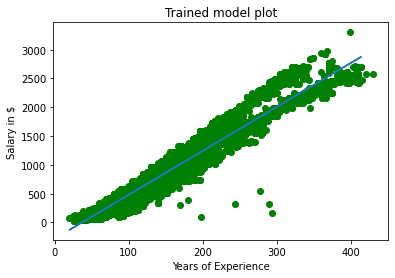

In [60]:
y_predict = lm.predict(x_test)
plt.scatter(x_train,y_train,color='green')
plt.plot(x_test,y_predict)
plt.xlabel("scheduled arrival time")
plt.ylabel("Distance ")
plt.title("Trained model plot")
plt.plot

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, lm.predict(x_test))*100

94.42041933196388